In [117]:
import pandas as pd
import numpy as np

df = pd.read_csv('sonar_train.csv')
df2 = pd.read_csv('sonar_test.csv')

In [118]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Class
0,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032,R
1,0.0599,0.0474,0.0498,0.0387,0.1026,0.0773,0.0853,0.0447,0.1094,0.0351,...,0.0013,0.0005,0.0227,0.0209,0.0081,0.0117,0.0114,0.0112,0.0100,M
2,0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,...,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110,R
3,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,R
4,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R


In [119]:
df2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Class
0,0.0125,0.0152,0.0218,0.0175,0.0362,0.0696,0.0873,0.0616,0.1252,0.1302,...,0.0041,0.0074,0.0030,0.0050,0.0048,0.0017,0.0041,0.0086,0.0058,R
1,0.0530,0.0885,0.1997,0.2604,0.3225,0.2247,0.0617,0.2287,0.0950,0.0740,...,0.0244,0.0199,0.0257,0.0082,0.0151,0.0171,0.0146,0.0134,0.0056,M
2,0.0368,0.0279,0.0103,0.0566,0.0759,0.0679,0.0970,0.1473,0.2164,0.2544,...,0.0105,0.0024,0.0018,0.0057,0.0092,0.0009,0.0086,0.0110,0.0052,M
3,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R
4,0.0216,0.0124,0.0174,0.0152,0.0608,0.1026,0.1139,0.0877,0.1160,0.0866,...,0.0052,0.0049,0.0096,0.0134,0.0122,0.0047,0.0018,0.0006,0.0023,R


In [120]:
df.shape

(139, 61)

In [121]:
df2.shape

(69, 61)

In [122]:
#check for null values
df.isnull().sum()

A1       0
A2       0
A3       0
A4       0
A5       0
        ..
A57      0
A58      0
A59      0
A60      0
Class    0
Length: 61, dtype: int64

In [123]:
df2.isnull().sum()


A1       0
A2       0
A3       0
A4       0
A5       0
        ..
A57      0
A58      0
A59      0
A60      0
Class    0
Length: 61, dtype: int64

<h3> create a simple Nearest Neighbour algorithm with Minkowski Distance with power of Q </h3>

## define the x and y

In [124]:
x_train = df.drop('Class', axis=1)
y_train = df['Class']


In [125]:
x_test = df2.drop('Class', axis=1)
y_test = df2['Class']

In [126]:
#scale the x values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)




In [127]:
x_train

array([[-0.93165451, -0.8731433 , -0.94288121, ..., -0.33592537,
        -0.32740932, -0.73095381],
       [ 1.37735619,  0.30647505,  0.21154975, ...,  0.49024938,
         0.55903847,  0.75325143],
       [-0.86948884, -0.31677691, -0.5207191 , ...,  0.51975562,
        -0.31068389,  0.97151691],
       ...,
       [-1.21584044, -0.56911795, -0.33309149, ..., -1.04407515,
        -0.77899592, -0.40355559],
       [ 0.54256001, -0.29245489,  0.48777928, ..., -0.45395033,
         0.10745186, -0.46903524],
       [-0.08353712, -0.63904378, -0.19758267, ...,  0.19518697,
         0.44196046,  0.6004656 ]])

In [128]:
x_test

array([[-0.7259323 , -0.778415  , -0.69580242, ..., -0.62590092,
         0.07507607, -0.10744991],
       [ 0.98007881,  1.46029167,  3.99940088, ...,  1.20406363,
         0.8107327 , -0.14193384],
       [ 0.29767437, -0.3905354 , -0.99931472, ...,  0.1583696 ,
         0.44290438, -0.21090169],
       ...,
       [ 0.04493198, -0.2072852 , -0.73803022, ...,  0.78578602,
        -0.38470932, -0.7626445 ],
       [ 0.96322931,  0.4768489 ,  1.9460742 , ...,  0.45464958,
         4.33575404,  2.47884451],
       [-0.4900394 , -0.79674002, -1.202536  , ..., -0.50390328,
         0.12105461,  0.35808308]])

In [129]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(139, 60)
(139,)
(69, 60)
(69,)


In [130]:
# label encoding y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [131]:
# cereating the minikowski distance function
#d(x,y) = (∑|xi-yi|^p)^(1/p)
def minkowski_distance(x, y, p):
    #"zip(x,y)" = pairs up the elements of "x" and "y" for each corresponding index creating a new iteratiable tuple
    #The "for" loop iterates the two tuples produced by the "zip" assigning "i" th element of "x" and "xi" and the "i" th element of "y" to "yi"
    #The expression of "abs(xi-yi)**p" computes the absolute distance between the "i" th element of "x" and "y" raised by the power of "p"
    #The "sum" function adds up all the values to produce the final value of the distance
    distance =  (sum(abs(xi-yi)**p for xi, yi in zip(x,y))) # calculating the distance between x and y
    distance = distance ** (1/p) # raise the distance to the power of 1/p
    return distance # return the distance

In [132]:
# creating the Nearest Neighbour Algorithm
def nearest_neighbour(x_train, x_test, y_train, p):
    y_pred = [] # creating an empty list to store the predicted values
    # for each row in the test set
    for i in range(len(x_test)):
        distances = []
        # for each row in the training set
        for j in range(len(x_train)):
            distance = minkowski_distance(x_test[i], x_train[j], p) # calculate the distance between the test and training set
            distances.append(distance) # append the distance to the list
         #get the indices for the knn
        indices = np.argsort(distances)[:p]
        #get the corresponding labels for the knn
        labels = y_train[indices]
        #predict the lables on the test set
        predict_label =  np.argmax(np.bincount(labels))
        y_pred.append(predict_label)
    return y_pred

In [133]:
p = 1 # manhatten distance
y_pred = nearest_neighbour(x_train, x_test, y_train, p) 

In [134]:
print(y_pred)

[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]


In [135]:
x1 = pd.DataFrame({'True': y_test, 'Predicted': y_pred})
x2 = pd.crosstab(x1['True'], x1['Predicted'])



In [136]:
print(x1)

    True  Predicted
0      1          1
1      0          0
2      0          0
3      1          1
4      1          1
..   ...        ...
64     0          0
65     0          0
66     1          1
67     0          0
68     1          1

[69 rows x 2 columns]


In [137]:
print(x2)

Predicted   0   1
True             
0          36   1
1           3  29


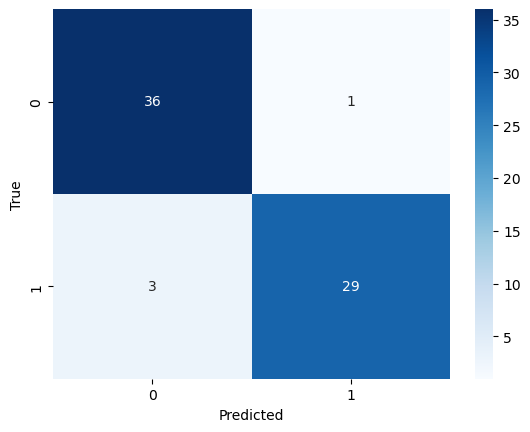

In [138]:
# create a heatmap for the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x2, annot=True, cmap='Blues')
plt.show()


In [139]:
# get the TP, TN, FP, FN
TP = x2.iloc[0,0]
TN = x2.iloc[1,1]
FP = x2.iloc[1,0]
FN = x2.iloc[0,1]
print("TP: ", TP)
print("TN: ", TN)
print("FP: ", FP)
print("FN: ", FN)

TP:  36
TN:  29
FP:  3
FN:  1


In [140]:
# calcuate the precision, recall, f1-score and accuracy
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*(precision*recall)/(precision+recall)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1_score)
print("Accuracy: ", accuracy)


Precision:  0.9230769230769231
Recall:  0.972972972972973
F1-Score:  0.9473684210526315
Accuracy:  0.9420289855072463
